In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from google.colab import files
import io

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')

# --- This new section will prompt you to upload the file ---
print("Please upload the 'bank-full.csv' file.")
uploaded = files.upload()
# -----------------------------------------------------------

# Get the filename and load the uploaded file into pandas
file_name = next(iter(uploaded))
df = pd.read_csv(io.BytesIO(uploaded[file_name]), sep=';')


print("\nDataset loaded successfully from your uploaded file!")
df.head()

Please upload the 'bank-full.csv' file.


Saving bank-full.csv to bank-full.csv

Dataset loaded successfully from your uploaded file!


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
# Get a summary of the dataframe (data types, non-null values)
print("Dataframe Info:")
df.info()

print("\n\nSummary Statistics for Numerical Columns:")
# Get descriptive statistics for numerical columns
df.describe()

Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Summary Statistics for Numerical Columns:


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


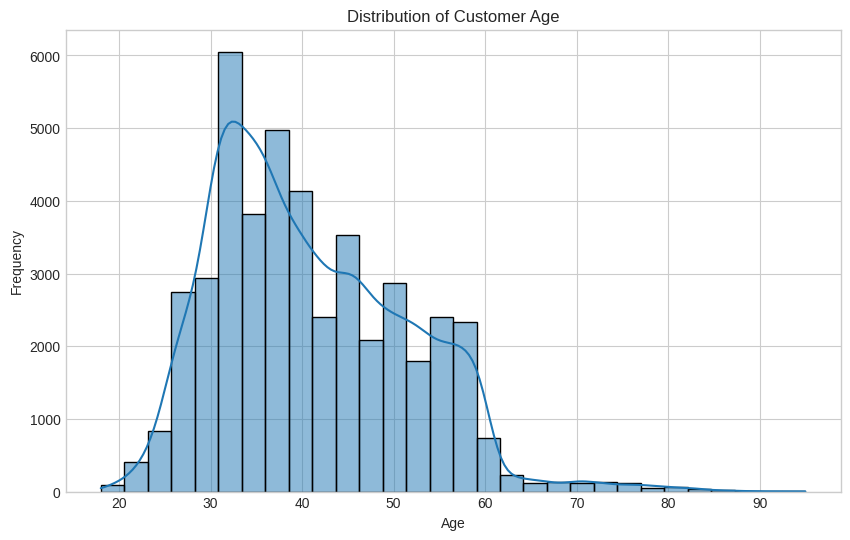

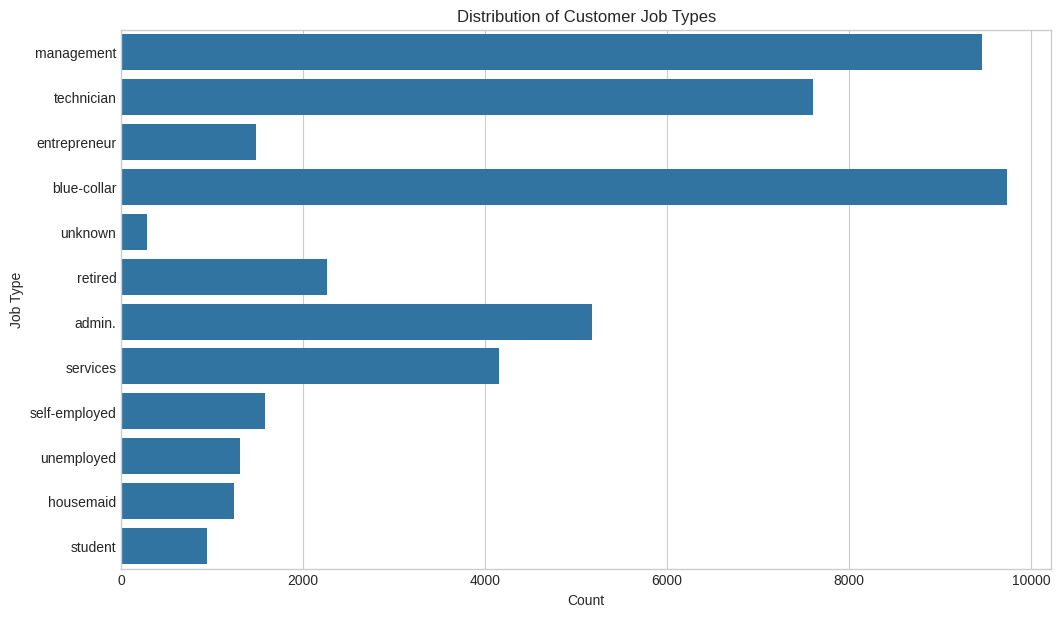

In [6]:
# Visualize the distribution of customer Age
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of Job Types
plt.figure(figsize=(12, 7))
sns.countplot(y=df['job'])
plt.title('Distribution of Customer Job Types')
plt.xlabel('Count')
plt.ylabel('Job Type')
plt.show()

In [7]:
# Select features for clustering
# We'll use age, account balance, duration of last contact, and number of contacts in this campaign
features = ['age', 'balance', 'duration', 'campaign']
cluster_df = df[features].copy()

# Scale the features
# Scaling ensures that one feature doesn't dominate the others just because it has larger values
scaler = StandardScaler()
scaled_features = scaler.fit_transform(cluster_df)

print("Data has been scaled and is ready for clustering.")

Data has been scaled and is ready for clustering.


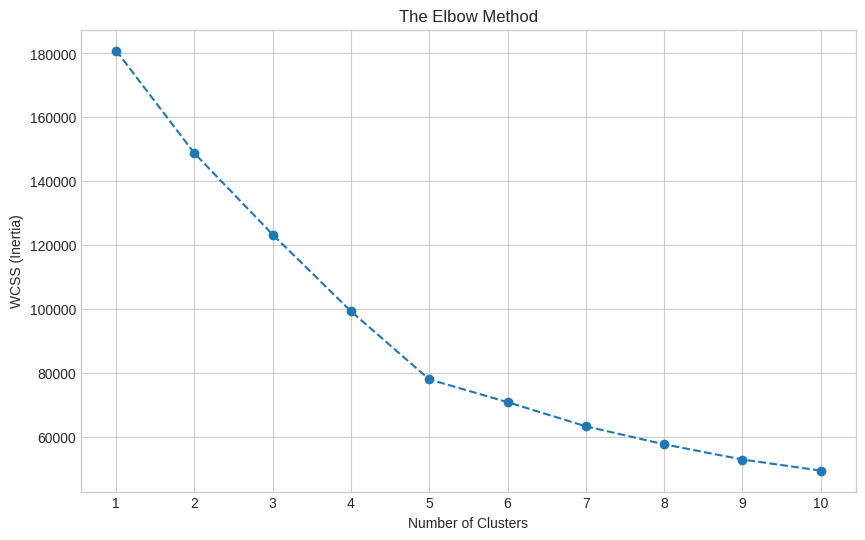

In [10]:
# --- The Elbow Method to find the optimal number of clusters ---
wcss = [] # Within-Cluster Sum of Squares
cluster_range = range(1, 11)

for i in cluster_range:
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Inertia)')
plt.xticks(cluster_range)
plt.show()

In [11]:
# Apply K-Means algorithm to group customers into 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init=10)
kmeans.fit(scaled_features)

# Add the cluster labels back to our original dataframe
df['cluster'] = kmeans.labels_

print("Clustering complete. Cluster labels added to the dataframe.")
df.head()

Clustering complete. Cluster labels added to the dataframe.


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,cluster
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,2
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,2
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,1


In [12]:
from sklearn.metrics import silhouette_score

# Calculate the Silhouette Score for our 3 clusters
score = silhouette_score(scaled_features, kmeans.labels_)
print(f'Silhouette Score for k=3: {score:.3f}')

Silhouette Score for k=3: 0.303


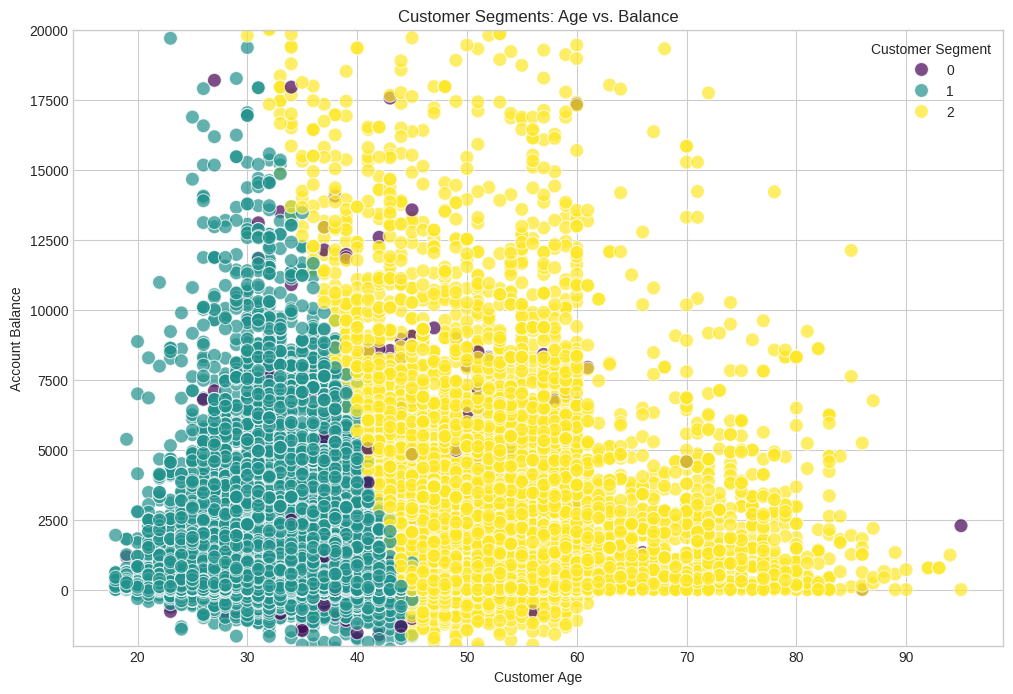

In [13]:
# Visualize the clusters to see them separated
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='age', y='balance', hue='cluster', palette='viridis', s=100, alpha=0.7)
plt.title('Customer Segments: Age vs. Balance')
plt.xlabel('Customer Age')
plt.ylabel('Account Balance')
plt.legend(title='Customer Segment')
# Set y-limit to exclude extreme outliers for a clearer visualization
plt.ylim(-2000, 20000)
plt.show()

In [14]:

cluster_analysis = df.groupby('cluster')[features].mean()
print(cluster_analysis)

               age      balance    duration   campaign
cluster                                               
0        40.246036  1094.141515  153.354668  14.637111
1        34.053997   963.698614  271.054443   2.242112
2        52.163926  2035.917405  248.017591   2.391469
